In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('Food_Delivery_Times.csv')

In [3]:
df.sample(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
98,64,7.46,Clear,Medium,Evening,Bike,8,5.0,42
990,122,17.97,Windy,Medium,Morning,Scooter,28,7.0,92
440,224,7.67,Windy,Low,Morning,Car,9,2.0,31
298,8,17.39,Foggy,Medium,Morning,Bike,25,4.0,100
793,929,12.85,Rainy,Medium,Evening,Scooter,6,7.0,61
734,907,16.44,Windy,High,Afternoon,Car,8,0.0,80
690,747,7.99,Clear,Medium,Evening,Bike,18,4.0,42
304,779,14.54,Clear,Medium,Evening,Bike,29,2.0,73
292,502,10.95,Clear,Medium,Evening,Scooter,24,4.0,55
209,825,10.98,Rainy,Low,Morning,Scooter,10,6.0,55


In [4]:
df.shape

(1000, 9)

In [5]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100

Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64

In [7]:
for i in df.select_dtypes(include=['object', 'category']).columns:
    print(df[i].value_counts())

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [8]:
df.drop(columns='Order_ID',axis=1,inplace=True)

In [9]:
df.shape

(1000, 8)

In [10]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [11]:
X = df.drop(columns='Delivery_Time_min',axis=1)
y = df['Delivery_Time_min']

In [12]:
X.shape , y.shape

((1000, 7), (1000,))

In [13]:
# Rows with at least one missing value
rows_with_missing_values = X[df.isnull().any(axis=1)]

# Display the row
rows_with_missing_values

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
6,9.52,Clear,Low,NaN,Bike,12,1.0
14,2.80,Clear,High,Morning,Scooter,10,NaN
24,11.20,Clear,Medium,Morning,Bike,23,NaN
42,0.99,NaN,Medium,Evening,Bike,15,NaN
71,4.17,NaN,Low,Evening,Scooter,5,1.0
...,...,...,...,...,...,...,...
974,11.68,Clear,NaN,Afternoon,Scooter,25,7.0
976,8.96,Snowy,NaN,Morning,Car,6,5.0
987,7.44,Rainy,Low,Evening,Bike,27,NaN
988,14.39,Rainy,Medium,Morning,Scooter,6,NaN


In [14]:
X['Weather'] = X['Weather'].fillna(df['Weather'].mode()[0])
X['Traffic_Level'] = X['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
X['Time_of_Day'] = X['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
X['Courier_Experience_yrs'] = X['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

In [15]:
X.isnull().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
dtype: int64

# check outlier and distributions

Distance_km: Skewness = 0.04 (Positive Skewness)


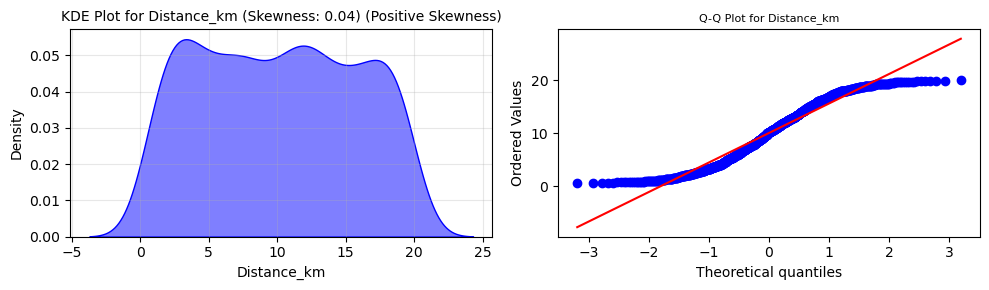

Preparation_Time_min: Skewness = 0.03 (Positive Skewness)


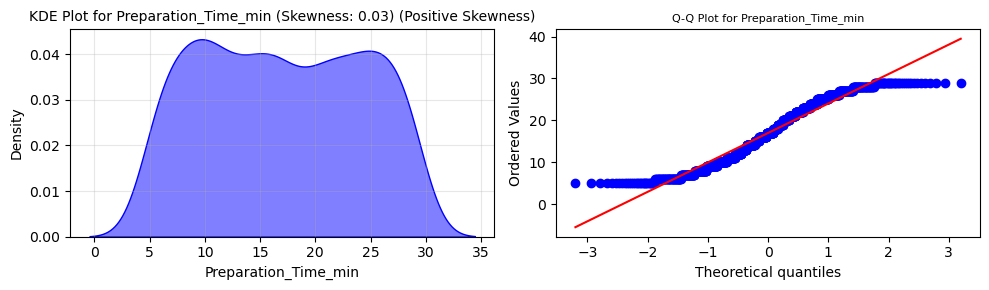

Courier_Experience_yrs: Skewness = -0.03 (Negative Skewness)


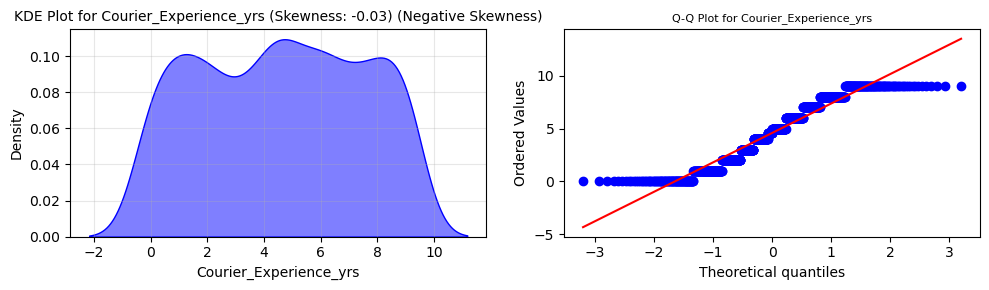

In [131]:
# Loop through each column in the DataFrame
for column in X.columns:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))  # Create a side-by-side plot
        
        skewness = X[column].skew()
        
        # Determine skewness type
        if skewness > 0:
            skew_type = "Positive Skewness"
        elif skewness < 0:
            skew_type = "Negative Skewness"
        else:
            skew_type = "Approximately Symmetrical"
        
        print(f"{column}: Skewness = {skewness:.2f} ({skew_type})")
        # KDE plot
        sns.kdeplot(X[column].dropna(), fill=True, color='blue', alpha=0.5, ax=axes[0])
        skewness = X[column].skew()  # Calculate skewness
        axes[0].set_title(f"KDE Plot for {column} (Skewness: {skewness:.2f}) ({skew_type})", fontsize=10)
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Density')
        axes[0].grid(alpha=0.3)
        
        # Q-Q plot
        stats.probplot(X[column].dropna(), dist="norm", plot=axes[1])
        axes[1].set_title(f"Q-Q Plot for {column}", fontsize=8)
        
        plt.tight_layout()
        plt.show()

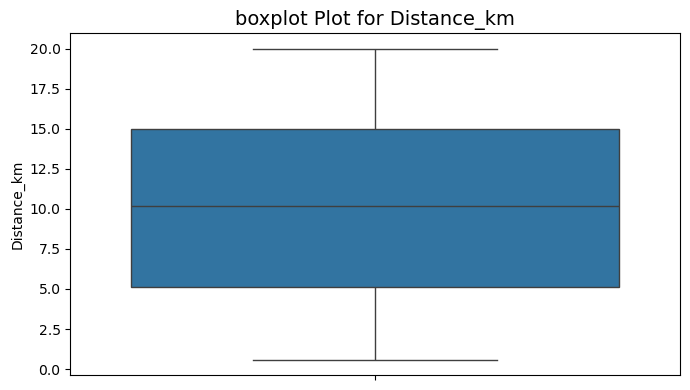

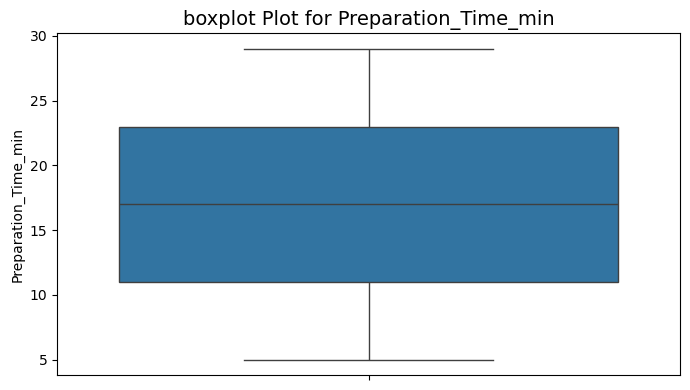

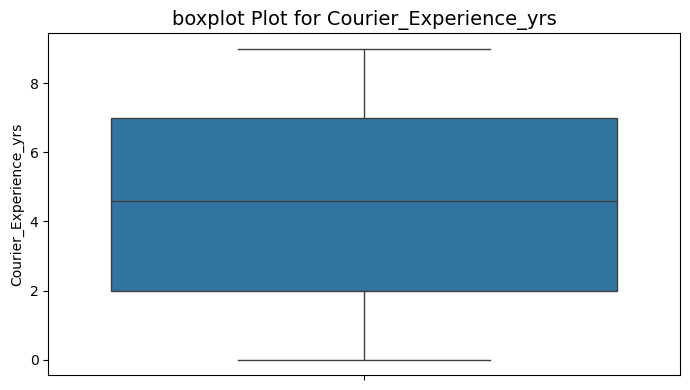

In [141]:
# Loop through each column in the DataFrame
for column in X.columns:
    if np.issubdtype(X[column].dtype, np.number):  # Check if the column is numeric
        plt.figure(figsize=(7,4))
        
        # KDE plot
        sns.boxplot(X[column])
        plt.title(f"boxplot Plot for {column}", fontsize=14)
    
        # plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# Encoded catagorical columns

In [20]:
# Create DataFrames for nominal and ordinal categorical columns
nominal_columns = []
nominal_X = X[['Time_of_Day','Vehicle_Type']].copy()
ordinal_X = X[['Weather','Traffic_Level']].copy()

In [21]:
ordinal_X['Weather'].value_counts()

Weather
Clear    500
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [22]:
ordinal_X['Traffic_Level'].value_counts()

Traffic_Level
Medium    420
Low       383
High      197
Name: count, dtype: int64

In [23]:
# Define the categories for each ordinal feature
category_orders = [
    ['Snowy', 'Rainy', 'Foggy', 'Windy', 'Clear'],
    ['High', 'Medium', 'Low'],        
]


In [24]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize and apply OrdinalEncoder
encoder = OrdinalEncoder(categories=category_orders)

In [25]:
encoded_odinal_x = encoder.fit_transform(ordinal_X)

In [26]:
encoded_odinal_x = encoded_odinal_x.astype(int)

In [27]:
encoded_odinal_x

array([[3, 2],
       [4, 1],
       [2, 2],
       ...,
       [0, 0],
       [4, 2],
       [2, 2]])

In [28]:
# Convert to DataFrame
ordinal_encoded_X = pd.DataFrame(encoded_odinal_x, columns=ordinal_X.columns)
ordinal_encoded_X

,Weather,Traffic_Level
0,3,2
1,4,1
2,2,2
3,1,1
4,4,2
...,...,...
995,4,0
996,1,2
997,0,0
998,4,2


In [29]:
nominal_encoded_x = pd.get_dummies(nominal_X, drop_first=True,dtype=int)

In [30]:
nominal_encoded_x

,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,1,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
995,1,0,0,1,0
996,0,1,0,0,1
997,1,0,0,0,1
998,0,0,0,0,0


In [31]:
final_cat_X =  pd.concat([nominal_encoded_x, ordinal_encoded_X], axis=1)

In [32]:
final_cat_X

,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Weather,Traffic_Level
0,0,0,0,0,1,3,2
1,1,0,0,0,0,4,1
2,0,0,1,0,1,2,2
3,0,0,0,0,1,1,1
4,0,1,0,0,0,4,2
...,...,...,...,...,...,...,...
995,1,0,0,1,0,4,0
996,0,1,0,0,1,1,2
997,1,0,0,0,1,0,0
998,0,0,0,0,0,4,2


In [33]:
final_cat_X.isnull().sum()

Time_of_Day_Evening     0
Time_of_Day_Morning     0
Time_of_Day_Night       0
Vehicle_Type_Car        0
Vehicle_Type_Scooter    0
Weather                 0
Traffic_Level           0
dtype: int64

In [34]:
X_final = pd.concat([X.drop(['Weather','Traffic_Level'],axis=1),final_cat_X], axis=1)

In [35]:
X_final.drop(columns=['Time_of_Day','Vehicle_Type'],axis=1,inplace=True)

In [36]:
X_final

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter,Weather,Traffic_Level
0,7.93,12,1.0,0,0,0,0,1,3,2
1,16.42,20,2.0,1,0,0,0,0,4,1
2,9.52,28,1.0,0,0,1,0,1,2,2
3,7.44,5,1.0,0,0,0,0,1,1,1
4,19.03,16,5.0,0,1,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...
995,8.50,13,3.0,1,0,0,1,0,4,0
996,16.28,8,9.0,0,1,0,0,1,1,2
997,15.62,26,2.0,1,0,0,0,1,0,0
998,14.17,8,0.0,0,0,0,0,0,4,2


# Train Test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [40]:
X_train.shape , X_test.shape

((800, 10), (200, 10))

In [41]:
y_train.shape,y_test.shape

((800,), (200,))

# Scale the values

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression

In [45]:
from sklearn.linear_model import Ridge

In [46]:
R_clf = Ridge(alpha=1.0)

In [47]:
R_clf.fit(X_train_scaled, y_train)

Ridge()

In [48]:
y_pred_r_train = R_clf.predict(X_train_scaled)
y_pred_r_test = R_clf.predict(X_test_scaled)

In [49]:
from sklearn.metrics import r2_score

In [50]:
score_train = r2_score(y_pred_r_train,y_train)
score_test = r2_score(y_pred_r_test,y_test)
print('Train accuracy : ',score_train," Test accuracy : ",score_test)

Train accuracy :  0.6854851697552409  Test accuracy :  0.779811429437753


In [51]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation and calculate mean R^2 score
r2_scores = cross_val_score(R_clf, X_train_scaled, y_train, cv=10, scoring='r2')
print("Mean R^2 Score:", np.mean(r2_scores))

# Display individual R^2 scores
print("R^2 Scores:", r2_scores)

Mean R^2 Score: 0.7507887605851694
R^2 Scores: [0.87110582 0.66557972 0.58027301 0.79577421 0.79612837 0.75546748
 0.63883608 0.83829166 0.81472746 0.75170379]


## Hyperparameter (alpha) tuning for the Ridge regression

In [53]:
# for i in range(1,20):
#     i = i/10
#     print("alpha = ",i)
#     clf = Ridge(alpha=i)
#     clf.fit(X_train_scaled, y_train)
#     score_train = r2_score(y_pred_r_train,y_train)
#     score_test = r2_score(y_pred_r_test,y_test)
#     print('Train accuracy : ',score_train," Test accuracy : ",score_test)

# Lasso regression

In [55]:
from sklearn.linear_model import Lasso

In [56]:
L_clf = Lasso(alpha=1e-4)

In [57]:
L_clf.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001)

In [58]:
y_pred_l_train = L_clf.predict(X_train_scaled)
y_pred_l_test = L_clf.predict(X_test_scaled)

In [59]:
score_train_l = r2_score(y_pred_l_train,y_train)
score_test_l = r2_score(y_pred_l_test,y_test)
print('Train accuracy : ',score_train_l," Test accuracy : ",score_test_l)

Train accuracy :  0.6862581016328771  Test accuracy :  0.7803565080544953


In [60]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation and calculate mean R^2 score
r2_scores = cross_val_score(L_clf, X_train_scaled, y_train, cv=10, scoring='r2')
print("Mean R^2 Score:", np.mean(r2_scores))

# Display individual R^2 scores
print("R^2 Scores:", r2_scores)

Mean R^2 Score: 0.7507596845156909
R^2 Scores: [0.87135756 0.66530358 0.58012362 0.79572641 0.79615672 0.75549738
 0.63892682 0.83800856 0.81482205 0.75167415]


## Hyperparameter (alpha) tuning for the Lasso regression

In [62]:
# for i in range(1,30):
#     i = i/1000
#     print("alpha = ",i)
#     clf = Lasso(alpha=i)
#     clf.fit(X_train_scaled, y_train)
#     score_train = r2_score(y_pred_r_train,y_train)
#     score_test = r2_score(y_pred_r_test,y_test)
#     print('Train accuracy : ',score_train," Test accuracy : ",score_test)